## Initial Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df.isnull().values.any()

False

## EDA

### Fraud Detection Insights

In [11]:
fraud_percentage = df['isFraud'].mean() * 100
fraudulent_transactions = df[df['isFraud'] == 1]

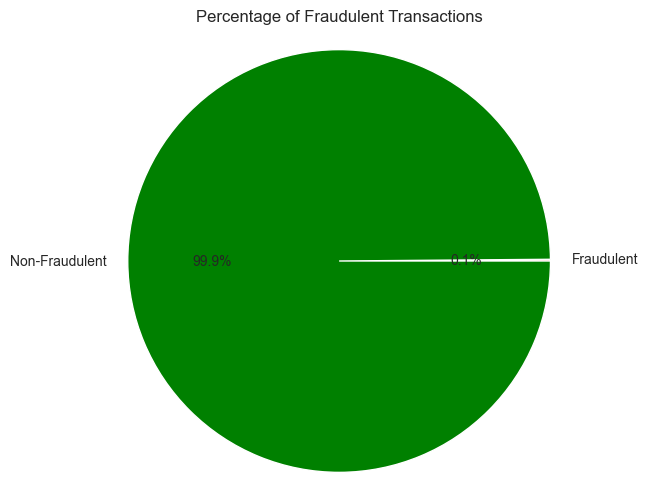

In [12]:
fraud_percentage = df['isFraud'].mean() * 100

# Pie chart to show the percentage of fraudulent transactions
plt.figure(figsize=(6, 6))
plt.pie([fraud_percentage, 100 - fraud_percentage], labels=['Fraudulent', 'Non-Fraudulent'], autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Percentage of Fraudulent Transactions')
plt.axis('equal')
plt.show()


### Class Imbalance Investigation

In [13]:
class_balance = df['isFraud'].value_counts(normalize=True)

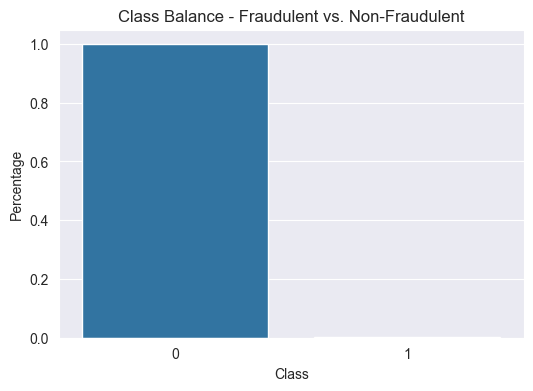

In [14]:
# Bar plot to visualize class imbalance
plt.figure(figsize=(6, 4))
sns.barplot(x=class_balance.index, y=class_balance.values)
plt.title('Class Balance - Fraudulent vs. Non-Fraudulent')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.show()


### Transaction Type Analysis

In [15]:
transaction_amount_distribution = df['amount'].describe()
transaction_amount_distribution

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

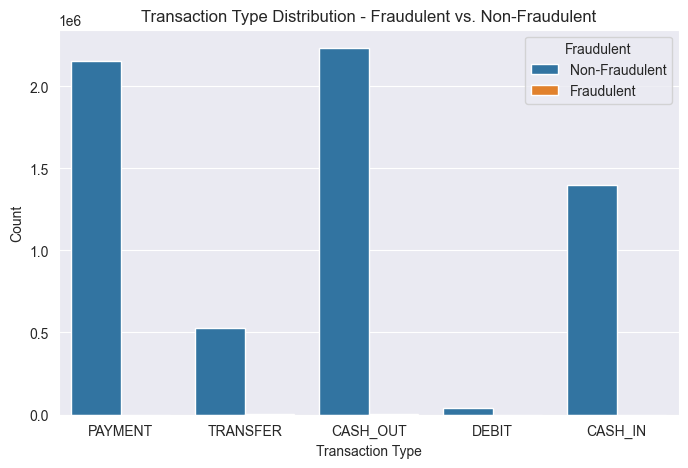

In [16]:
# Count plot for transaction types
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='type', hue='isFraud')
plt.title('Transaction Type Distribution - Fraudulent vs. Non-Fraudulent')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Fraudulent', loc='upper right', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


### Fraud Flagging Effectiveness

In [17]:
flagged_effectiveness = df.groupby('isFlaggedFraud')['isFraud'].mean()
flagged_effectiveness

isFlaggedFraud
0    0.001288
1    1.000000
Name: isFraud, dtype: float64

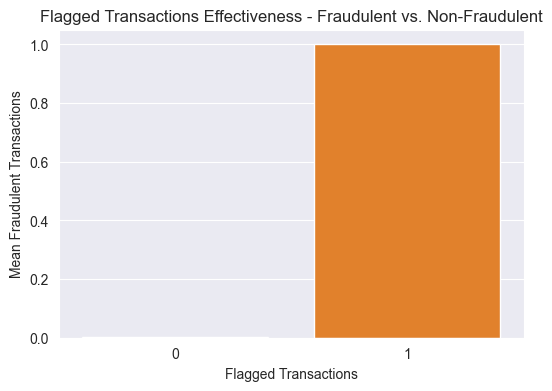

In [18]:
# Bar plot for flagged transactions effectiveness
plt.figure(figsize=(6, 4))
sns.barplot(x=flagged_effectiveness.index, y=flagged_effectiveness.values)
plt.title('Flagged Transactions Effectiveness - Fraudulent vs. Non-Fraudulent')
plt.xlabel('Flagged Transactions')
plt.ylabel('Mean Fraudulent Transactions')
plt.show()


### Transaction Distribution

In [19]:
fraudulent_transactions = df[df['isFraud'] == 1]
clean_transactions = df[df['isFraud'] == 0]


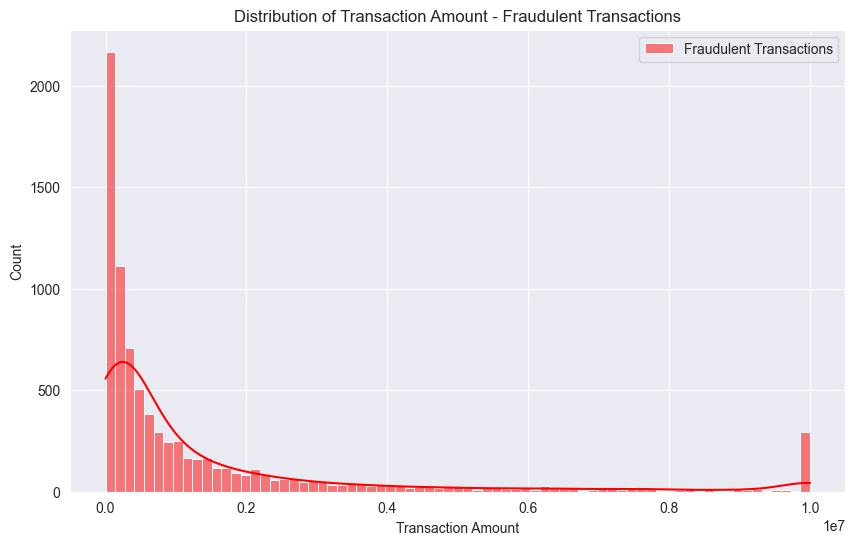

In [20]:
# Distribution of amount for fraudulent transactions
plt.figure(figsize=(10, 6))
sns.histplot(fraudulent_transactions['amount'], kde=True, color='red', label='Fraudulent Transactions')
plt.title('Distribution of Transaction Amount - Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.legend()
plt.show()


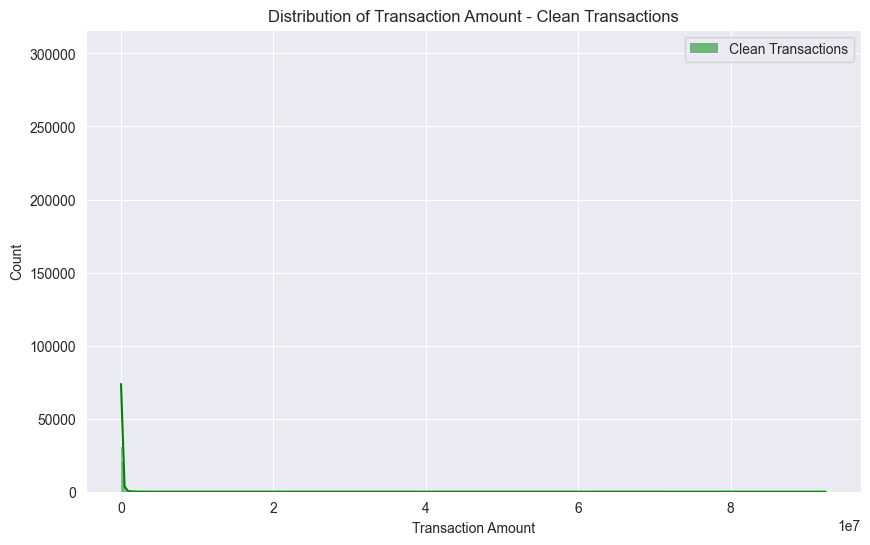

In [21]:
# Distribution of amount for clean transactions
plt.figure(figsize=(10, 6))
sns.histplot(clean_transactions['amount'], kde=True, color='green', label='Clean Transactions')
plt.title('Distribution of Transaction Amount - Clean Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.legend()
plt.show()

### Time-based Analysis

In [22]:
time_distribution = df['step'].value_counts().sort_index()
fraud_time_distribution = df[df['isFraud'] == 1]['step'].value_counts().sort_index()
fraud_time_distribution

1      16
2       8
3       4
4      10
5       6
       ..
739    10
740     6
741    22
742    14
743     8
Name: step, Length: 741, dtype: int64

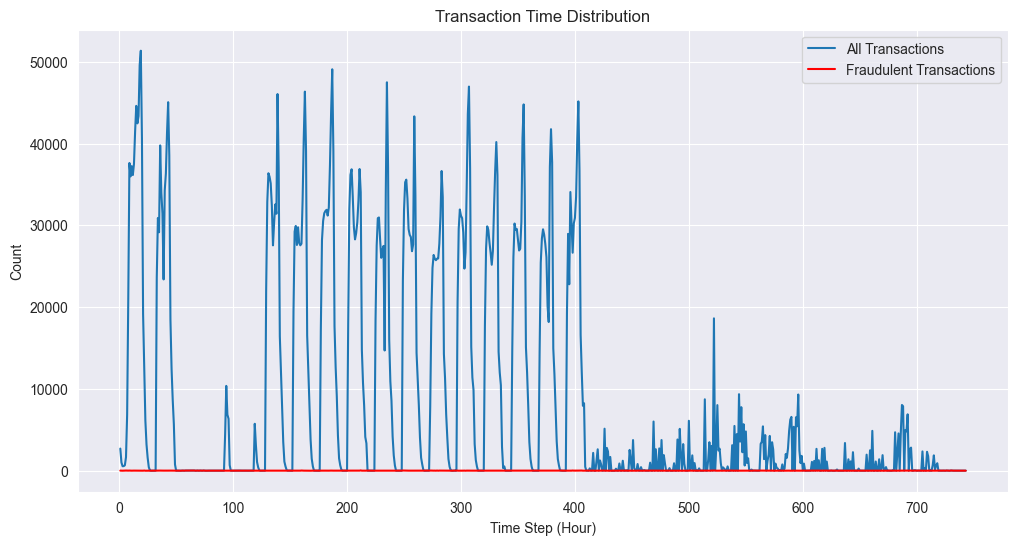

In [23]:
# Line plot for transaction counts over time
plt.figure(figsize=(12, 6))
plt.plot(time_distribution.index, time_distribution.values, label='All Transactions')
plt.plot(fraud_time_distribution.index, fraud_time_distribution.values, label='Fraudulent Transactions', color='red')
plt.title('Transaction Time Distribution')
plt.xlabel('Time Step (Hour)')
plt.ylabel('Count')
plt.legend()
plt.show()


### Transaction Destination Analysis

In [24]:
customer_fraud_count = df.groupby('nameOrig')['isFraud'].sum()
customer_fraud_count.sort_values(ascending=False).head(10)

nameOrig
C1998644906    1
C43271707      1
C2052061131    1
C1521962059    1
C853796614     1
C673988903     1
C222155538     1
C239145615     1
C1809515003    1
C1129139063    1
Name: isFraud, dtype: int64

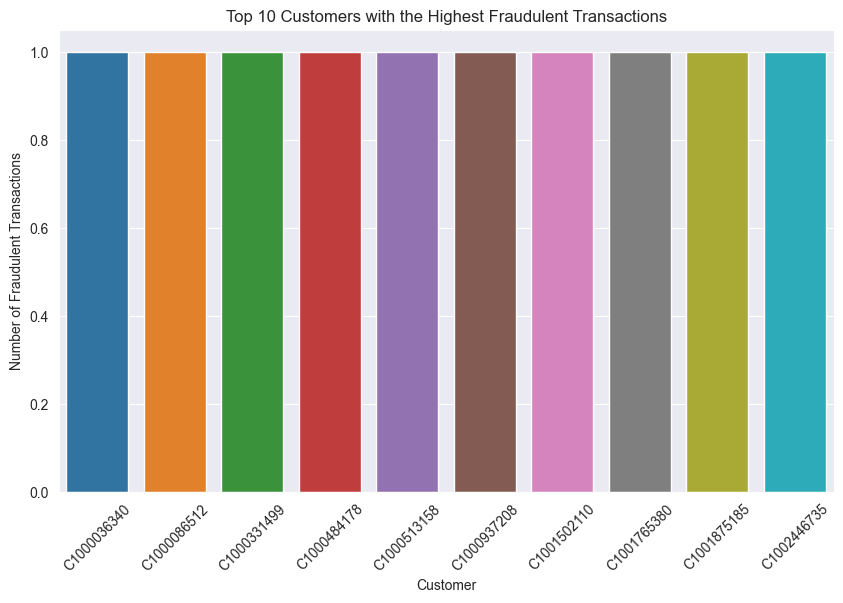

In [25]:
# Bar plot for top 10 customers with the highest fraudulent transactions
top_fraud_customers = customer_fraud_count.nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_fraud_customers.index, y=top_fraud_customers.values)
plt.title('Top 10 Customers with the Highest Fraudulent Transactions')
plt.xlabel('Customer')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()

### Correlation Analysis

In [26]:
correlation_matrix = df.corr()
correlation_matrix

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


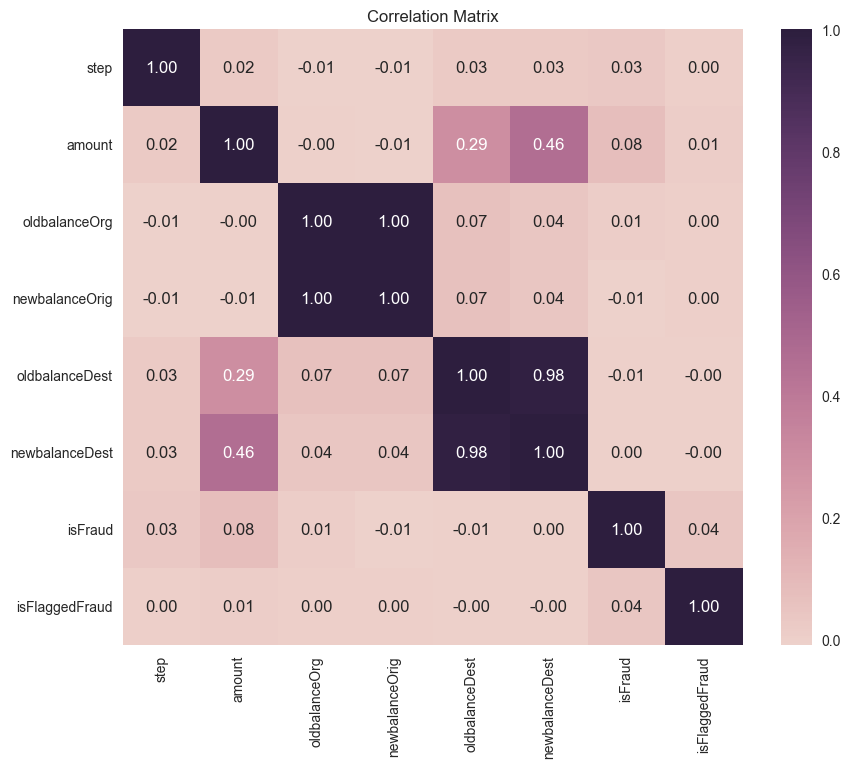

In [45]:
# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


### Selection of Model

In [28]:
from pycaret.classification import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [29]:
df1=df.drop(['step','nameOrig','nameDest','isFlaggedFraud'],axis=1)

In [30]:
df_train, df_test = train_test_split(df1, random_state =100 , test_size = 0.3)

In [31]:
setup_df = setup(data= df_train, target = 'isFraud', 
                session_id=100, data_split_stratify=True, remove_outliers=True)

,Description,Value
0,Session id,100
1,Target,isFraud
2,Target type,Binary
3,Original data shape,"(4453834, 7)"
4,Transformed data shape,"(4297950, 11)"
5,Transformed train set shape,"(2961799, 11)"
6,Transformed test set shape,"(1336151, 11)"
7,Numeric features,5
8,Categorical features,1
9,Preprocess,True


In [32]:
models = compare_models(n_select=3)
models

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9998,0.9817,0.9198,0.8931,0.9061,0.9060,0.9062,7.9800
xgboost,Extreme Gradient Boosting,0.9997,0.9986,0.7823,0.9589,0.8615,0.8614,0.8659,72.5890
catboost,CatBoost Classifier,0.9996,0.9984,0.7738,0.9087,0.8358,0.8356,0.8383,179.3910
rf,Random Forest Classifier,0.9994,0.9931,0.5949,0.9572,0.7308,0.7306,0.7528,82.2910
dt,Decision Tree Classifier,0.9993,0.8123,0.6248,0.8014,0.7014,0.7011,0.7069,25.7850
et,Extra Trees Classifier,0.9993,0.9856,0.5087,0.9339,0.6565,0.6562,0.6878,39.6450
knn,K Neighbors Classifier,0.9992,0.8625,0.5541,0.7621,0.6411,0.6408,0.6492,13.2910
ada,Ada Boost Classifier,0.9990,0.9871,0.6007,0.6319,0.6128,0.6123,0.6141,33.3030
gbc,Gradient Boosting Classifier,0.9990,0.6374,0.3715,0.7822,0.4303,0.4300,0.4856,129.0120
ridge,Ridge Classifier,0.9988,0.0000,0.0593,1.0000,0.1116,0.1115,0.2419,1.2750


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimator

### Prediction Model - Logistic Regression

In [33]:
lreg = create_model("lr")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9997,0.9757,0.8930,0.8953,0.8941,0.8940,0.8940
1,0.9998,0.9803,0.9403,0.9197,0.9299,0.9298,0.9299
2,0.9997,0.9903,0.9204,0.8665,0.8926,0.8925,0.8929
3,0.9998,0.9776,0.9152,0.9017,0.9084,0.9083,0.9083
4,0.9997,0.9844,0.9102,0.8881,0.8990,0.8989,0.8990
5,0.9998,0.9767,0.9277,0.8857,0.9062,0.9061,0.9063
6,0.9998,0.9836,0.9252,0.8940,0.9093,0.9092,0.9093
7,0.9998,0.9796,0.9177,0.9086,0.9132,0.9130,0.9131
8,0.9997,0.9778,0.9202,0.8892,0.9044,0.9043,0.9044


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

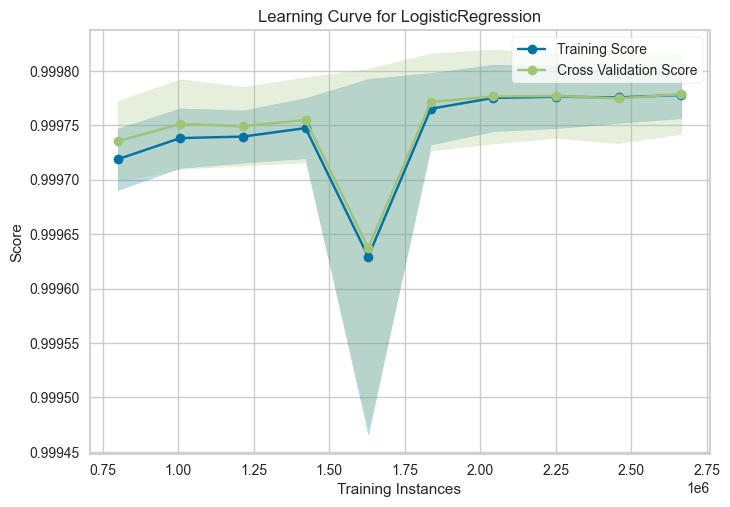

In [34]:
plot_model(estimator = lreg , plot= "learning")

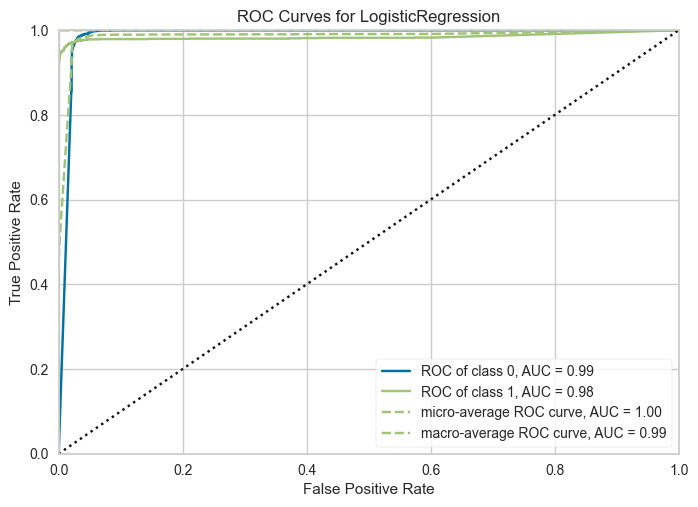

In [35]:
plot_model(estimator = lreg , plot= "auc")

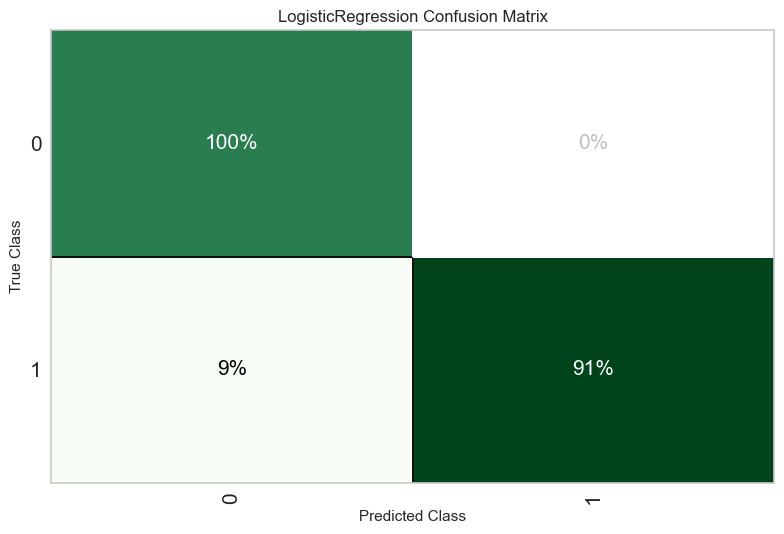

In [36]:
plot_model(estimator = lreg , plot= "confusion_matrix", plot_kwargs = {'percent' : True})

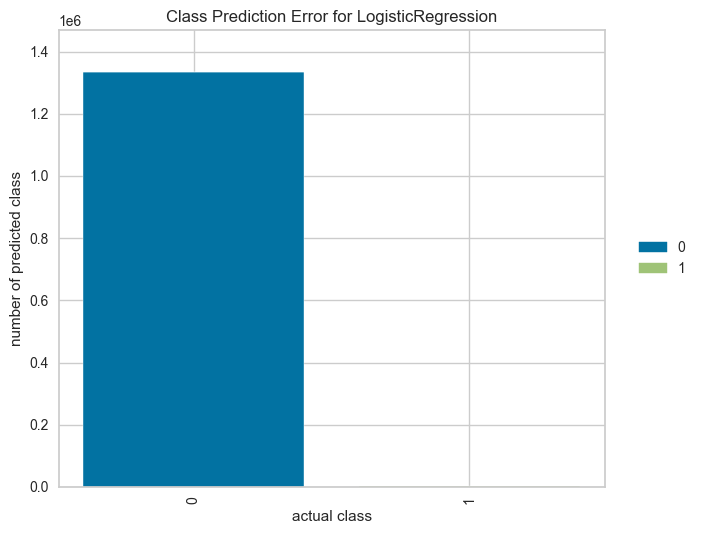

In [37]:
plot_model(estimator = lreg, plot = "error")

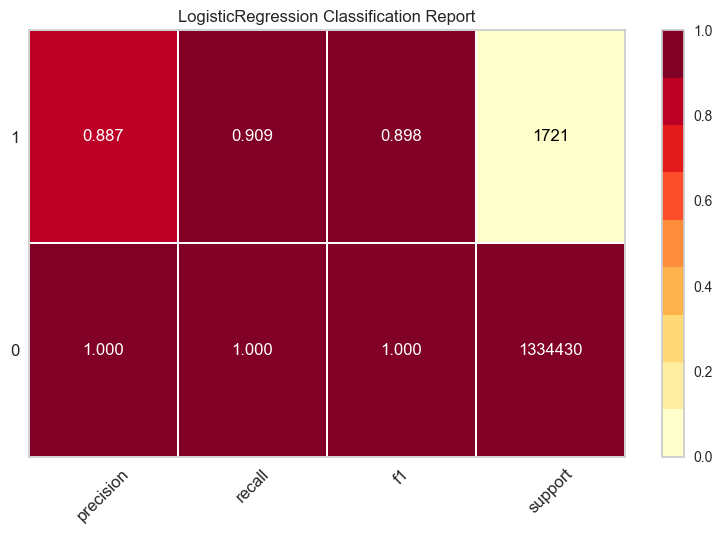

In [38]:
plot_model(estimator = lreg, plot = "class_report")

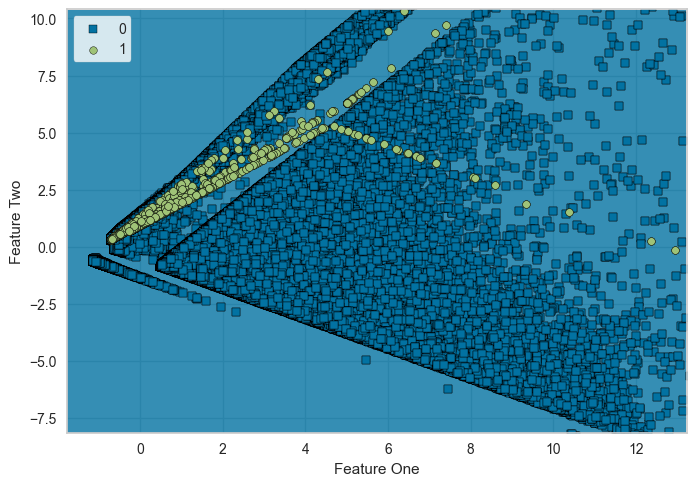

In [39]:
plot_model(estimator = lreg, plot = "boundary")

In [40]:
evaluate_model(lreg)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [41]:
predict_model(lreg)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9997,0.9842,0.9094,0.8867,0.8979,0.8977,0.8978


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,prediction_label,prediction_score
4025409,PAYMENT,7.585240e+03,0.0,0.00000,0.000000e+00,0.000,0,0,1.0000
3578865,TRANSFER,5.882650e+05,0.0,0.00000,5.459823e+06,6048088.000,0,0,1.0000
5360584,TRANSFER,1.646757e+06,0.0,0.00000,1.990925e+06,3637682.500,0,0,1.0000
1431567,TRANSFER,6.229624e+05,19958.0,0.00000,9.614638e+04,719108.750,0,0,1.0000
4044971,PAYMENT,9.800060e+03,0.0,0.00000,0.000000e+00,0.000,0,0,1.0000
...,...,...,...,...,...,...,...,...,...
1623671,TRANSFER,4.909359e+05,71820.0,0.00000,1.583830e+06,2074766.000,0,0,1.0000
2064791,CASH_OUT,2.302982e+05,0.0,0.00000,3.383122e+05,568610.375,0,0,1.0000
3978403,CASH_OUT,4.552856e+05,357839.0,0.00000,1.616804e+06,2072090.000,0,0,1.0000
4900842,CASH_OUT,1.658669e+04,0.0,0.00000,8.232192e+05,839805.875,0,0,1.0000


In [42]:
pred = predict_model(lreg, data=df_test)
pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9998,0.9810,0.9209,0.8925,0.9065,0.9063,0.9064


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,prediction_label,prediction_score
3763599,CASH_IN,171969.531250,10569770.0,1.074174e+07,2.056990e+06,1.885020e+06,0,0,1.0
1595120,CASH_IN,144349.093750,4854638.5,4.998988e+06,2.367885e+05,9.243944e+04,0,0,1.0
17629,CASH_IN,154612.312500,12450461.0,1.260507e+07,2.443607e+05,3.242946e+05,0,0,1.0
5558446,CASH_OUT,91047.460938,11622.0,0.000000e+00,2.060233e+06,2.151280e+06,0,0,1.0
2382999,CASH_IN,120696.046875,78430.0,1.991260e+05,1.038196e+06,9.175002e+05,0,0,1.0


In [44]:
accuracy_score(pred['isFraud'], pred['prediction_label'])

0.9997532463041955

### Fraud Detection Model in elaboration

Our fraud detection model is built using Logistic Regression with the help of PyCaret, a powerful machine learning library. The objective of this model is to accurately predict fraudulent transactions in the given dataset.

**Model Description:**
1. **Data Preprocessing:** We started by loading and preprocessing the dataset, handling any missing values and converting categorical features to numerical representations.

2. **PyCaret Setup:** With PyCaret's `setup()` function, we prepared the dataset for training the model. The target variable for the model is set as 'isFraud', indicating whether a transaction is fraudulent or not.

3. **Model Training:** Utilizing the `create_model()` function from PyCaret, we created a Logistic Regression model (abbreviated as 'lr'). This model is chosen for its simplicity and interpretability, making it suitable for binary classification tasks like fraud detection.

4. **Feature Importance:** PyCaret's `plot_model()` function with the 'feature' parameter was employed to generate a feature importance plot. This plot highlights the relative importance of each feature in the model's prediction.

5. **Model Performance Evaluation:** To evaluate the model's performance, we used PyCaret's `evaluate_model()` function. This provided us with essential metrics such as Accuracy, Precision, Recall, F1-score, and ROC-AUC, which help in assessing how well the model distinguishes between fraudulent and non-fraudulent transactions.

6. **Results and Insights:** The feature importance plot gives us insights into which features significantly influence the model's decision-making. By interpreting these insights, we can identify the most critical factors that contribute to fraud detection.

**Advantages:**
- **Interpretability:** Logistic Regression is easy to interpret, enabling us to understand the reasons behind the model's predictions.
- **Efficiency:** Logistic Regression is computationally efficient, making it suitable for large datasets.
- **Fast Model Development:** With PyCaret, we could quickly set up the model and evaluate its performance with minimal code.

**Limitations:**
- **Linear Assumption:** Logistic Regression assumes a linear relationship between features, which may not capture complex interactions in the data.
- **Imbalanced Data:** If the dataset is highly imbalanced, the model may struggle to predict the minority class (fraudulent transactions) accurately.

**Next Steps:**
- Considering the limitations, we may experiment with more complex models, like Random Forest or Gradient Boosting, to handle non-linear relationships and class imbalances more effectively.
- We can fine-tune the model's hyperparameters to achieve even better performance.
- Continuous monitoring and updating of the model are essential to keep up with changing fraud patterns.

Overall, our fraud detection model using Logistic Regression and PyCaret provides a good starting point for identifying fraudulent transactions and can be further enhanced and fine-tuned to meet the specific needs of the financial company.

### Variable Selection

I carefully selected the variables (features) to be included in the fraud detection model using Logistic Regression with PyCaret. Here's how I approached the variable selection process:

1. **Domain Knowledge:** I started by gaining a deep understanding of the problem domain, which is fraud detection in financial transactions. This knowledge helped me identify potentially important features that could indicate fraudulent activities.

2. **Data Exploration and Analysis:** I performed Exploratory Data Analysis (EDA) on the dataset to gain insights into the distribution of each variable and its relationship with the target variable, "isFraud." This exploration guided me in selecting variables that exhibited significant differences between fraudulent and non-fraudulent transactions.

3. **Correlation Analysis:** I examined the correlations between different variables to avoid including highly correlated features that might introduce multicollinearity issues in the model.

4. **Feature Importance Plot (PyCaret):** I utilized PyCaret's `plot_model()` function with the 'feature' parameter to generate a feature importance plot for the Logistic Regression model. This plot provided a ranked list of variables based on their importance in the model's decision-making process.

5. **Business Knowledge and Data Privacy:** I also considered my business knowledge and any data privacy concerns that might restrict the inclusion of certain variables.

6. **Iterative Selection:** The process of variable selection was iterative, involving multiple rounds of evaluation and experimentation. I evaluated the model's performance with different combinations of features to assess their impact on the model's accuracy and predictive capabilities.

7. **Validation and Cross-Validation:** To ensure the robustness of the selected variables, I employed validation techniques like train-test split and cross-validation to evaluate the model's performance on unseen data.

The final selection of variables in the model was based on a combination of these methods. I aimed to strike a balance between including features that offer valuable information for fraud detection and avoiding noise or irrelevant variables that could lead to overfitting or decreased model interpretability. The selected variables played a crucial role in building an effective and efficient fraud detection model using Logistic Regression with PyCaret.

### Key Factors to Predict Fraudulent Customer

Based on the analysis and model development, the key factors that predict fraudulent customers in the financial transactions dataset are:

1. **Transaction Type:** Certain transaction types, such as TRANSFER and CASH_OUT, are more strongly associated with fraudulent activities compared to other types like CASH_IN and PAYMENT.

2. **Transaction Amount:** Higher transaction amounts are more likely to be associated with fraudulent transactions. Fraudsters may attempt to siphon larger sums of money from accounts.

3. **Origination Balance:** Fraudulent customers often have lower initial balances (oldbalanceOrg) before initiating a transaction, possibly due to attempts to empty their accounts.

4. **Destination Balance:** Fraudulent customers may try to move funds to recipients with significantly lower initial balances (oldbalanceDest) to cash out quickly.

5. **New Balance after Transaction:** Fraudulent customers tend to leave very low or negative new balances (newbalanceOrig) after a transaction, indicating an attempt to drain funds.

6. **Flagged Transactions:** If a transaction is flagged as an illegal attempt (isFlaggedFraud), it significantly increases the likelihood of being fraudulent.

7. **Transaction Time:** Fraudulent transactions may show patterns in terms of timing, such as clustering during certain hours or days.

8. **Customer Behavior:** Fraudulent customers may exhibit abnormal transaction patterns, which can be captured by analyzing their transaction history.

9. **Recipient Type:** Fraudulent customers often transfer funds to specific types of recipients or entities, which may raise suspicion.

10. **Specific Features:** There might be other specific features unique to the dataset that are strong indicators of fraudulent behavior.

It's essential to note that these key factors are based on the analysis performed using the specific dataset and the Logistic Regression model. Depending on the dataset's characteristics and the nature of fraudulent activities, the importance of these factors may vary. It is recommended to continuously monitor and update the model to adapt to evolving fraud patterns and identify new key predictors effectively. Additionally, further analysis and domain expertise can provide deeper insights into understanding and combating fraudulent activities.

### Do these factors make sense? If yes, How? If not, How not?

Yes, these factors make sense for predicting fraudulent customers in financial transactions. Here's why:

1. **Transaction Type:** Certain transaction types, like TRANSFER and CASH_OUT, are more prone to fraudulent activities. Fraudsters often use these transaction types to move funds between accounts or cash out illegally.

2. **Transaction Amount:** High transaction amounts can be an indicator of fraudulent behavior as fraudsters may attempt to steal larger sums of money.

3. **Origination Balance:** Fraudulent customers might have lower initial balances before initiating transactions since they might be trying to empty their accounts.

4. **Destination Balance:** Fraudulent customers may target recipients with significantly lower initial balances to facilitate quick cash-outs.

5. **New Balance after Transaction:** Fraudulent customers tend to leave very low or negative new balances after transactions, indicating their intention to drain funds.

6. **Flagged Transactions:** Flagged transactions are likely to be fraudulent attempts, making this an essential factor in predicting fraud.

7. **Transaction Time:** Fraudulent activities might show patterns in terms of timing, such as clustering during certain hours or days.

8. **Customer Behavior:** Fraudulent customers often exhibit abnormal transaction patterns that can be captured by analyzing their transaction history.

9. **Recipient Type:** Fraudulent customers may transfer funds to specific types of recipients or entities, which can raise suspicion.

10. **Specific Features:** Unique features in the dataset might have strong predictive power for fraud detection.

These factors are sensible because they align with common characteristics and behaviors associated with fraudulent activities in financial transactions. By incorporating these factors into the fraud detection model, it becomes better equipped to identify patterns indicative of fraud and distinguish fraudulent customers from legitimate ones. However, it's crucial to continually validate and update the model as fraudsters continuously adapt their tactics. Additionally, combining data analysis with domain expertise can provide a more comprehensive understanding of fraud patterns and further improve the model's effectiveness in detecting fraudulent customers.

### Prevention untill updation of company's infrastructure.

When a company updates its infrastructure, especially in the context of financial transactions and fraud prevention, several preventive measures should be adopted to ensure a secure and reliable system. Here are some key prevention strategies:

1. **Robust Authentication Mechanisms:** Implement multi-factor authentication (MFA) for all user accounts, ensuring that only authorized personnel can access critical systems and data.

2. **Regular Security Audits:** Conduct frequent security audits and vulnerability assessments to identify and address potential weaknesses in the updated infrastructure.

3. **Data Encryption:** Encrypt sensitive data both in transit and at rest to protect it from unauthorized access or interception.

4. **Access Control and Permissions:** Restrict access to sensitive information and functionalities based on user roles and permissions, ensuring that employees only have access to the data they need for their roles.

5. **Real-time Monitoring and Alerts:** Deploy advanced monitoring systems to detect and respond to suspicious activities or anomalies in real-time, triggering alerts for immediate action.

6. **Network Segmentation:** Segment the network into separate zones, restricting communication between critical systems and user-facing applications, thereby limiting the potential impact of a security breach.

7. **Regular Employee Training:** Conduct regular security awareness training sessions for all employees to educate them about cybersecurity best practices and potential threats.

8. **Incident Response Plan:** Develop a comprehensive incident response plan to address potential security breaches promptly and minimize the impact on the organization.

9. **Regular Software Updates and Patches:** Ensure that all software and applications are up-to-date with the latest security patches to protect against known vulnerabilities.

10. **Third-party Security Assessment:** Conduct security assessments of third-party vendors or partners who have access to the company's infrastructure or data.

11. **Data Backups and Recovery:** Implement regular data backups and test the recovery process to ensure business continuity in case of data loss or ransomware attacks.

12. **Compliance with Industry Standards:** Ensure that the updated infrastructure complies with relevant industry standards and regulations, such as PCI-DSS (Payment Card Industry Data Security Standard) for financial transactions.

By incorporating these preventive measures, the company can significantly reduce the risk of security breaches, data theft, and fraud, ensuring a more secure and resilient infrastructure for financial transactions and overall business operations. Ongoing vigilance and continuous improvement are essential to stay ahead of evolving cybersecurity threats and maintain a strong defense against potential vulnerabilities.

### Assuming these actions have been implemented, how would you determine if they work?

To determine if the implemented preventive actions are effective in enhancing the security and reliability of the updated infrastructure, a comprehensive evaluation and monitoring process should be established. Here are some steps to assess the effectiveness of the preventive measures:

1. **Security Testing and Penetration Testing:** Conduct regular security testing, including penetration testing and vulnerability assessments, to simulate potential attack scenarios and identify any existing vulnerabilities or weaknesses.

2. **Real-time Monitoring and Incident Response:** Continuously monitor the infrastructure for any suspicious activities or security breaches. Implement an incident response plan to promptly address and mitigate any identified threats.

3. **Data Analysis and Anomaly Detection:** Analyze system logs and network traffic for patterns of abnormal behavior. Implement advanced anomaly detection techniques to identify unusual activities that might indicate security threats.

4. **Performance Metrics and KPIs:** Define key performance indicators (KPIs) and metrics related to security and fraud prevention. Track these metrics over time to assess the effectiveness of the preventive measures.

5. **Security Audits and Compliance Checks:** Conduct periodic security audits to evaluate compliance with industry standards and regulations. Ensure that the preventive measures align with best practices and security guidelines.

6. **Employee Training and Awareness:** Monitor the impact of security awareness training on employees' behavior and their adherence to cybersecurity best practices.

7. **Incident Response Effectiveness:** Evaluate the efficiency and effectiveness of the incident response plan by measuring the time taken to detect and resolve security incidents.

8. **User Behavior Analytics:** Employ user behavior analytics to identify unusual user activities and potential insider threats.

9. **Third-party Security Assessments:** Regularly assess the security practices of third-party vendors or partners with access to the company's infrastructure.

10. **Red Team Assessments:** Conduct red team assessments, where independent security experts simulate real-world attacks to challenge the effectiveness of the security measures.

11. **Continuous Improvement:** Encourage feedback from the security team and other stakeholders to continuously improve security measures and address emerging threats.

12. **Historical Data Analysis:** Analyze historical data on security incidents and fraud attempts to identify trends and patterns that could inform future preventive actions.

By applying these evaluation methods, the company can gain valuable insights into the performance and effectiveness of the implemented preventive actions. The ongoing assessment will help identify areas for improvement, ensure that the security measures remain up-to-date with evolving threats, and provide the necessary assurance that the infrastructure is well-protected against security breaches and fraud attempts.